In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [52]:
from lmfit import minimize, Parameters, fit_report

def sigmoid(x, x0, k, a, b):
    y = a / (1 + np.exp(-k*(x-x0))) + b
    return y

def residual(params, x, data):    
    #model = sigmoid(x, *[params[key].value for key in ['x0', 'k', 'a', 'b']])
    model = sigmoid(x, *params.values()) # assuming order of params is the same for efficiency
    return (data-model)

def fit_sigmoid(x, data, vary_a=False, vary_b=False):
  params = Parameters()
  params.add('x0', value=55, min=30, max=80)
  params.add('k', value=0.0)
  params.add('a', value=1.0, vary=vary_a)
  params.add('b', value=0.0, vary=vary_b)
  return minimize(residual, params, args=(x,data))


In [97]:
# Load data and fit TMT curves
tmt_data = pd.read_csv('../data/peptideTMT.csv', sep=' ', index_col='seq')
tmt_data = tmt_data.groupby('seq').mean()

_x = tmt_data.columns.astype('float').values
def df_fit_sigmoid(series):
    return fit_sigmoid(_x, series.values)

fits = tmt_data.apply(df_fit_sigmoid,axis=1)

In [133]:
_x

array([30.1, 33.7, 38.6, 43.9, 51.3, 54.9, 59.8, 65.2, 69.5, 74. ])

In [153]:
x0_fits = fits.apply(lambda x: x.params['x0'].value)
chi2_fits = fits.apply(lambda x: x.chisqr)

pisa_data = tmt_data[tmt_data.columns.values[2:-3]]
pisa_fits = pisa_data.loc[fits.index].sum(axis=1)
fits_df = pd.DataFrame({"x0":x0_fits, "chi2":chi2_fits, "pisa":pisa_fits}, index=fits.index)

# Basic filtering
fits_df = fits_df[(fits_df['x0'] > 37) & (fits_df['x0'] < 60)]
fits_df = fits_df[(fits_df['chi2'] < 0.5)]
fits_df = fits_df[(fits_df['pisa'] < 6.0)]

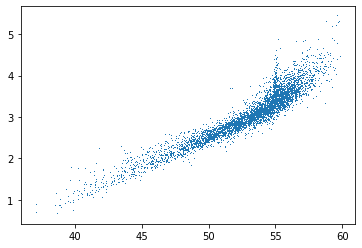

In [154]:
plt.plot(fits_df['x0'], fits_df['pisa'], ',')

In [156]:

fits_df['pisa'].to_csv('../data/tstab_data.csv', header=None, sep=' ')

In [157]:
import pandas as pd
hits = pd.read_csv('../data/tstab_data.csv', sep=' ', header=None, names=['seq','val'])

In [158]:
hits['allele'] = 'A0201'
hits['seq'] = hits['seq'].str.upper()

In [159]:
hits.to_csv('../data/tstab_data.txt', sep=' ', float_format='%.2f', index=False)